<a href="https://colab.research.google.com/github/ritwikraha/CV-Practice/blob/master/Voice_to_Image.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -qq nemo_toolkit['all']
!pip install -qq diffusers accelerate

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.7/2.7 MB 10.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.7/15.7 MB 48.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.8/117.8 kB 12.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 97.5/97.5 kB 14.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 97.6/97.6 kB 14.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 92.3/92.3 kB 14.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.0/41.0 kB 6.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 88.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.5/154.5 kB 22.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.5/79.5 kB 11.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 725.0/725.0 kB 47.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 840.2/840.2 kB 48.1 M

In [1]:
import nemo.collections.asr as nemo_asr
from diffusers import AutoPipelineForText2Image
import torch

In [2]:
torch.__version__

'2.1.0+cu121'

In [3]:
!wget https://dldata-public.s3.us-east-2.amazonaws.com/2086-149220-0033.wav
!wget https://www.dropbox.com/scl/fi/cyzgddzt76fnaamzos3nb/ttz-e01.wav

--2024-02-11 13:28:15--  https://dldata-public.s3.us-east-2.amazonaws.com/2086-149220-0033.wav
Resolving dldata-public.s3.us-east-2.amazonaws.com (dldata-public.s3.us-east-2.amazonaws.com)... 16.12.64.138, 16.12.64.34, 52.219.108.10, ...
Connecting to dldata-public.s3.us-east-2.amazonaws.com (dldata-public.s3.us-east-2.amazonaws.com)|16.12.64.138|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 237964 (232K) [audio/wav]
Saving to: ‘2086-149220-0033.wav’

2086-149220-0033.wa 100%[===================>] 232.39K  --.-KB/s    in 0.08s   

2024-02-11 13:28:16 (2.74 MB/s) - ‘2086-149220-0033.wav’ saved [237964/237964]

--2024-02-11 13:28:16--  https://www.dropbox.com/scl/fi/cyzgddzt76fnaamzos3nb/ttz-e01.wav
Resolving www.dropbox.com (www.dropbox.com)... 162.125.3.18, 2620:100:6018:18::a27d:312
Connecting to www.dropbox.com (www.dropbox.com)|162.125.3.18|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: ‘ttz-e0

In [4]:
asr_model = nemo_asr.models.EncDecRNNTBPEModel.from_pretrained(model_name="nvidia/parakeet-tdt-1.1b")

parakeet-tdt-1.1b.nemo:   0%|          | 0.00/4.28G [00:00<?, ?B/s]

[NeMo I 2024-02-11 13:29:15 mixins:170] Tokenizer SentencePieceTokenizer initialized with 1024 tokens


[NeMo W 2024-02-11 13:29:16 modelPT:161] If you intend to do training or fine-tuning, please call the ModelPT.setup_training_data() method and provide a valid configuration file to setup the train data loader.
    Train config : 
    manifest_filepath: null
    sample_rate: 16000
    batch_size: 1
    shuffle: true
    num_workers: 8
    pin_memory: true
    max_duration: 20
    min_duration: 0.1
    is_tarred: true
    tarred_audio_filepaths: null
    shuffle_n: 2048
    bucketing_strategy: fully_randomized
    bucketing_batch_size:
    - 64
    - 64
    - 32
    - 32
    - 32
    - 32
    - 16
    - 16
    - 64
    - 64
    - 32
    - 32
    - 32
    - 32
    - 16
    - 16
    - 64
    - 64
    - 32
    - 32
    - 32
    - 32
    - 16
    - 16
    defer_setup: true
    
[NeMo W 2024-02-11 13:29:16 modelPT:168] If you intend to do validation, please call the ModelPT.setup_validation_data() or ModelPT.setup_multiple_validation_data() method and provide a valid configuration file to set

[NeMo I 2024-02-11 13:29:16 features:289] PADDING: 0
[NeMo I 2024-02-11 13:29:26 rnnt_models:211] Using RNNT Loss : tdt
    Loss tdt_kwargs: {'fastemit_lambda': 0.0, 'clamp': -1.0, 'durations': [0, 1, 2, 3, 4], 'sigma': 0.02, 'omega': 0.1}
[NeMo I 2024-02-11 13:29:40 save_restore_connector:249] Model EncDecRNNTBPEModel was successfully restored from /root/.cache/huggingface/hub/models--nvidia--parakeet-tdt-1.1b/snapshots/74ec7598b4a8dae899a5bd04eaa0e9a92bf36a62/parakeet-tdt-1.1b.nemo.


In [5]:
pipeline_text2image = AutoPipelineForText2Image.from_pretrained(
    "stabilityai/stable-diffusion-xl-base-1.0", torch_dtype=torch.float16, variant="fp16", use_safetensors=True
).to("cuda")

model_index.json:   0%|          | 0.00/609 [00:00<?, ?B/s]

Fetching 19 files:   0%|          | 0/19 [00:00<?, ?it/s]

scheduler/scheduler_config.json:   0%|          | 0.00/479 [00:00<?, ?B/s]

text_encoder/config.json:   0%|          | 0.00/565 [00:00<?, ?B/s]

tokenizer/merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

tokenizer/vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

tokenizer/special_tokens_map.json:   0%|          | 0.00/472 [00:00<?, ?B/s]

text_encoder_2/config.json:   0%|          | 0.00/575 [00:00<?, ?B/s]

tokenizer/tokenizer_config.json:   0%|          | 0.00/737 [00:00<?, ?B/s]

tokenizer_2/special_tokens_map.json:   0%|          | 0.00/460 [00:00<?, ?B/s]

tokenizer_2/merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

tokenizer_2/vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

unet/config.json:   0%|          | 0.00/1.68k [00:00<?, ?B/s]

tokenizer_2/tokenizer_config.json:   0%|          | 0.00/725 [00:00<?, ?B/s]

vae/config.json:   0%|          | 0.00/642 [00:00<?, ?B/s]

model.fp16.safetensors:   0%|          | 0.00/1.39G [00:00<?, ?B/s]

model.fp16.safetensors:   0%|          | 0.00/246M [00:00<?, ?B/s]

diffusion_pytorch_model.fp16.safetensors:   0%|          | 0.00/5.14G [00:00<?, ?B/s]

diffusion_pytorch_model.fp16.safetensors:   0%|          | 0.00/167M [00:00<?, ?B/s]

diffusion_pytorch_model.fp16.safetensors:   0%|          | 0.00/167M [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

In [7]:
output = asr_model.transcribe(['2086-149220-0033.wav'])

Transcribing:   0%|          | 0/1 [00:00<?, ?it/s]

In [8]:
output[0][0]

"well i don't wish to see it any more observed phoebe turning away her eyes it is certainly very like the old portrait"

The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['sense of joy and evoke a feeling of satisfaction.']
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['sense of joy and evoke a feeling of satisfaction.']


  0%|          | 0/50 [00:00<?, ?it/s]

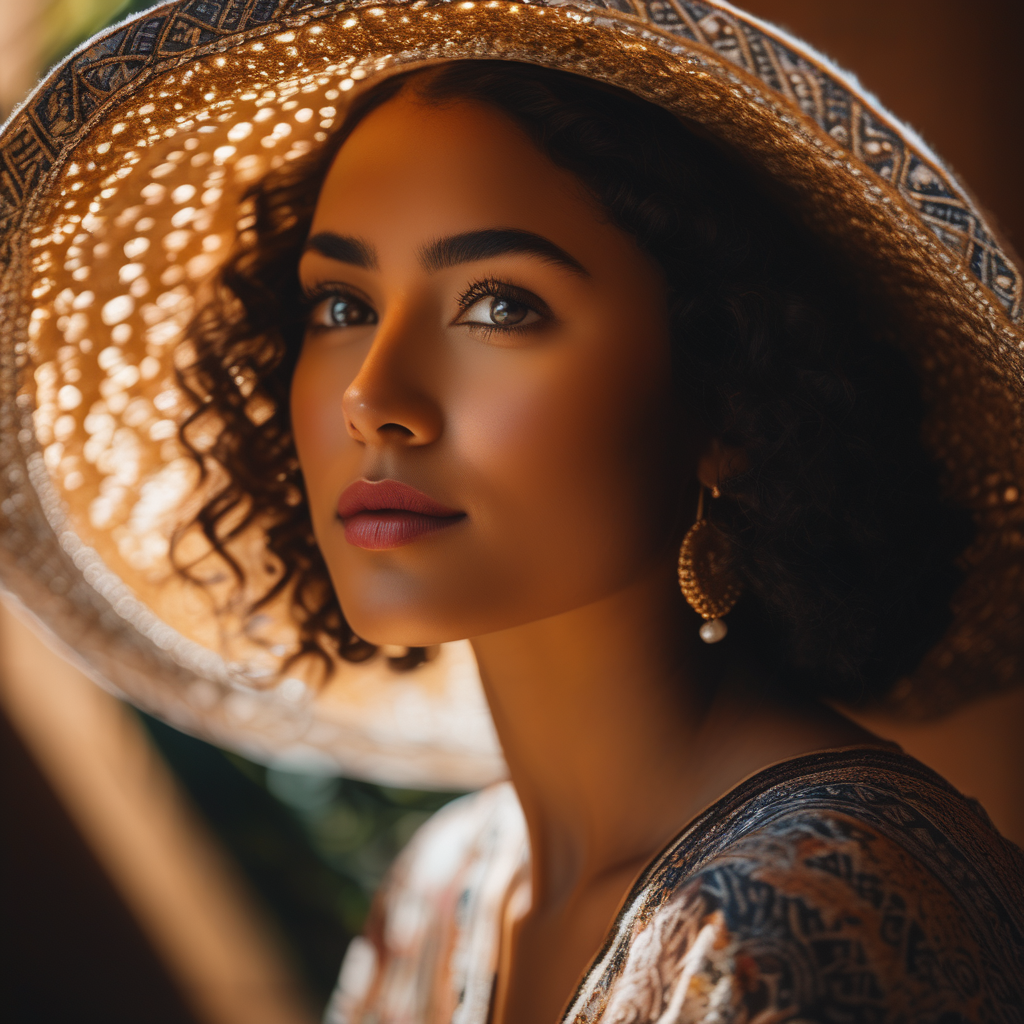

In [10]:
prompt = f"""A person desribed as, {output[0][0]} illuminated by soft, warm light,
in breathtakingly high detail and vivid 8K resolution. Focus on intricate textures,
subtle light and shadow interplay, and a stunning composition that draws the viewer's eye.
Capture a sense of joy and evoke a feeling of satisfaction."""

image = pipeline_text2image(prompt=prompt ,
                            negative_prompt="ugly, deformed, disfigured, poor details, bad anatomy",
                            height=1024,
                            width=1024,
                            guidance_scale=10.5,
                            ).images[0]
image